# Аналіз успішності студентів 
### (лабораторна робота №12)

In [35]:
import pandas as pd   
import matplotlib.pyplot as plt 

In [36]:
data = pd.read_csv('Expanded_data_with_more_features.csv',sep=',') 


In [37]:
data.columns
data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [38]:
data.head(5)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### 2. Створюємо датафрейм та обираємо 5 стовпчиків для подальшого аналізу

In [39]:
data_fream = data[['Gender', 'ParentEduc', 'MathScore', 'ReadingScore', 'WritingScore' ]]

In [40]:
data_fream.head(5)

,Gender,ParentEduc,MathScore,ReadingScore,WritingScore
0,female,bachelor's degree,71,71,74
1,female,some college,69,90,88
2,female,master's degree,87,93,91
3,male,associate's degree,45,56,42
4,male,some college,76,78,75


### 3. Описуємо датафрейм

In [41]:
data_fream.dtypes

Gender          object
ParentEduc      object
MathScore        int64
ReadingScore     int64
WritingScore     int64
dtype: object

### 4.  a. Додаємо стовпчик 'EverageScore'

In [42]:
data_fream=data_fream.assign(EverageScore=round((data_fream.MathScore + data_fream.ReadingScore + data_fream.WritingScore)/3, 2))

In [43]:
data_fream.head(5)

,Gender,ParentEduc,MathScore,ReadingScore,WritingScore,EverageScore
0,female,bachelor's degree,71,71,74,72.00
1,female,some college,69,90,88,82.33
2,female,master's degree,87,93,91,90.33
3,male,associate's degree,45,56,42,47.67
4,male,some college,76,78,75,76.33


### с. Фільтруємо учнів у яких середній бал >= 91

In [44]:
more_90 = data_fream[(data_fream['EverageScore'] >= 91)]
len(more_90)

1747

### b. Здійснюємо групування по середній успішності чоловіків і жінок 

In [45]:
gender = data_fream.groupby('Gender').median()
gender

/var/folders/d_/m95y8vmd14s17wr96v8ppn_c0000gn/T/ipykernel_3319/3732484786.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender = data_fream.groupby('Gender').median()


,MathScore,ReadingScore,WritingScore,EverageScore
Gender,,,,
female,64.0,73.0,73.0,70.33
male,69.0,66.0,64.0,66.33


### Здійснюємо групування за освітою батьків 

In [46]:
parent_educ = more_90.groupby('ParentEduc').median()
parent_educ

/var/folders/d_/m95y8vmd14s17wr96v8ppn_c0000gn/T/ipykernel_3319/4229238566.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parent_educ = more_90.groupby('ParentEduc').median()


,MathScore,ReadingScore,WritingScore,EverageScore
ParentEduc,,,,
associate's degree,93.0,96.0,96.0,94.00
bachelor's degree,94.0,96.0,97.0,94.67
high school,92.0,96.0,96.0,94.00
master's degree,94.0,97.0,98.0,95.00
some college,93.0,96.0,97.0,94.00
some high school,92.0,96.0,96.0,94.00


### d. Здійснюємо сортування від меншого до більшого

In [47]:
everage_score = parent_educ.sort_values(by=['EverageScore'])
everage_score

,MathScore,ReadingScore,WritingScore,EverageScore
ParentEduc,,,,
associate's degree,93.0,96.0,96.0,94.00
high school,92.0,96.0,96.0,94.00
some college,93.0,96.0,97.0,94.00
some high school,92.0,96.0,96.0,94.00
bachelor's degree,94.0,96.0,97.0,94.67
master's degree,94.0,97.0,98.0,95.00


### Створюємо графік 'Залежність оцінок від освіти батьків'

<Axes: title={'center': 'Залежність оцінок від освіти батьків'}, xlabel='ParentEduc'>

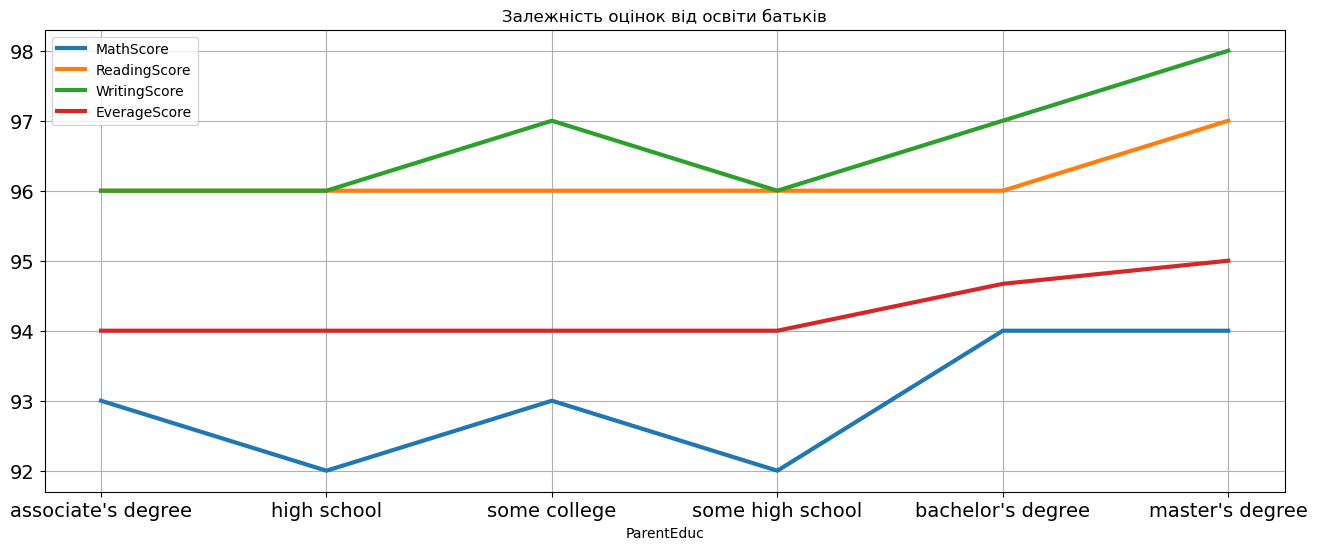

In [64]:
everage_score.plot(figsize=(16,6), fontsize=14, grid=True, title='Залежність оцінок від освіти батьків', linewidth=3)

### Створюємо кругову діаграму

In [49]:
educ = data_fream.groupby('ParentEduc').size() 

array([<Axes: >], dtype=object)

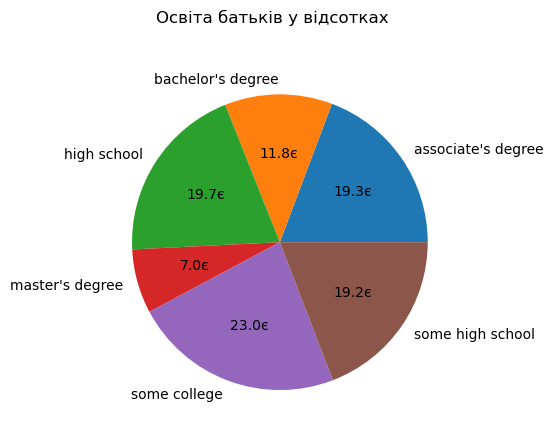

In [50]:
educ.plot(kind='pie',subplots=True, autopct='%.1fє', title='Освіта батьків у відсотках')

### Створюємо стовпчасту діаграму

<Axes: title={'center': 'Успішність чоловіків і жінок'}, xlabel='Gender'>

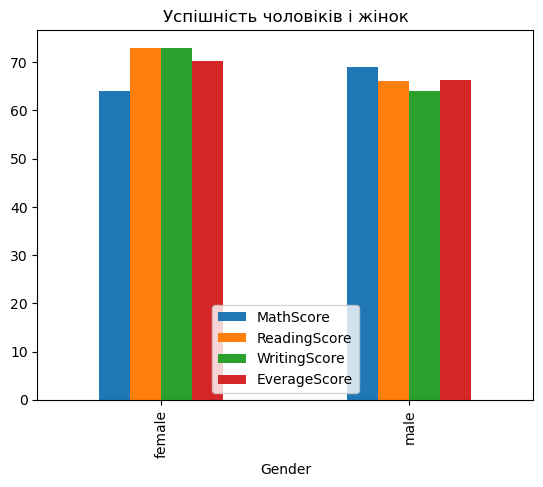

In [51]:
gender.plot(kind='bar', title='Успішність чоловіків і жінок')